# DATA SET: ratings_Electronics.csv

### Author: Kranti Sambhaji Walke

### Data Description:
Amazon Reviews data ( data source ) The repository has several datasets. For this case study, we are using the Electronics dataset.
### Domain:
E-commerce
### Context:
Online E-commerce websites like Amazon, Flipkart uses different recommendation models to provide different
suggestions to different users. Amazon currently uses item-to-item collaborative filtering, which scales to massive data sets and produces high-quality recommendations in real-time.
### Attribute Information:
● userId : Every user identified with a unique id

● productId : Every product identified with a unique id

● Rating : Rating of the corresponding product by the corresponding user

# 1. Read and explore the given dataset. (Rename column/add headers, plot histograms, find data characteristics)

## Import the necessary libraries

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#Import required libraries
import numpy as np
import pandas as pd
import math
import json
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.externals import joblib
import scipy.sparse
from scipy.sparse import csr_matrix
import warnings; warnings.simplefilter('ignore')
%matplotlib inline

## Read the data as a data frame

In [2]:
data=pd.read_csv('ratings_Electronics.csv')
data.head()

,AKM1MP6P0OYPR,0132793040,5.0,1365811200
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600


## Basic EDA 

## Data Import
## Read and explore the dataset. ( Rename column, plot histograms, find data characteristics)
## Import the data set

In [3]:
my_data = pd.read_csv('ratings_Electronics.csv', sep=',',names=["userId", "productId", "Rating", "timestamp"])#, header=None)

In [4]:
my_data.head()

,userId,productId,Rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


## find data characteristics 

In [6]:
# Check the number of rows and columns
rows, columns = my_data.shape
print("No of rows: ", rows) 
print("No of columns: ", columns) 

No of rows:  7824482
No of columns:  4


The dataset has 7824482 observations/samples.

There are 2 alphanumeric variables.
There are 2 numerical variables/features.

## Check Data types

In [7]:
my_data.dtypes

userId        object
productId     object
Rating       float64
timestamp      int64
dtype: object

## Check for missing values present 

In [8]:
print('Number of missing values across columns-\n', my_data.isnull().sum())

Number of missing values across columns-
 userId       0
productId    0
Rating       0
timestamp    0
dtype: int64


There are no missing values with total records 7824482

## Summary statistics of 'Rating' variable 

In [9]:
my_data['Rating'].describe().transpose()

count    7.824482e+06
mean     4.012337e+00
std      1.380910e+00
min      1.000000e+00
25%      3.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: Rating, dtype: float64

## find minimum and maximum Ratings 

In [10]:
print('The minimum rating is: %d' %(my_data['Rating'].min()))
print('The maximum rating is: %d' %(my_data['Rating'].max()))

The minimum rating is: 1
The maximum rating is: 5


Ratings are on scale of 1 - 5

## Ploting histogram to check that if data columns are normal or almost normal or not.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002511A964048>,
      dtype=object)

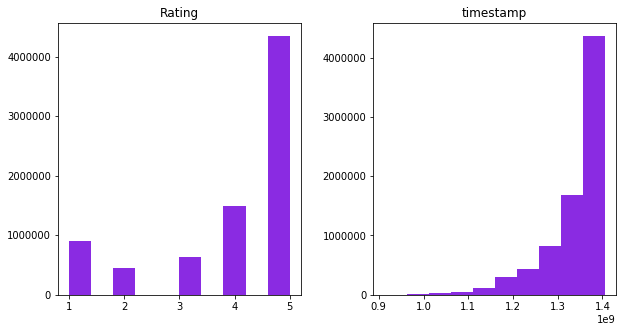

In [11]:
my_data.hist(figsize=(10,5),color="blueviolet",grid=False)
plt.show()

## Check the distribution of ratings  

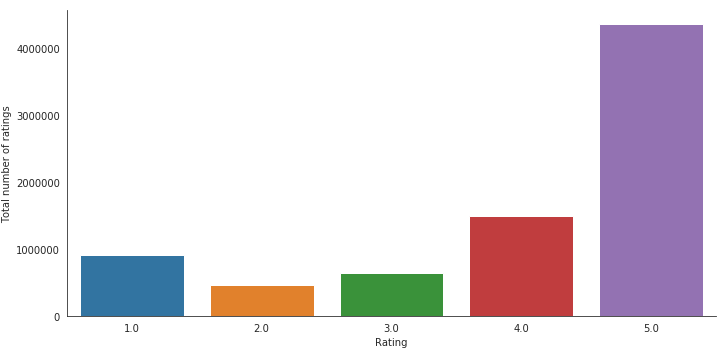

In [12]:
with sns.axes_style('white'):
    g = sns.factorplot("Rating", data=my_data, aspect=2.0,kind='count')
    g.set_ylabels("Total number of ratings") 

## Number of unique user id and product id in the data 

In [13]:
print('Number of unique USERS in Raw data = ', my_data['userId'].nunique())
print('Number of unique ITEMS in Raw data = ', my_data['productId'].nunique())

Number of unique USERS in Raw data =  4201696
Number of unique ITEMS in Raw data =  476002


### Take subset of dataset to make it less sparse/more dense. (For example, keep the users only who has given 50 or more number of ratings)

## Top 10 users based on rating 

In [14]:
most_rated = my_data.groupby('userId').size().sort_values(ascending=False)[:50]
most_rated

userId
A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
A1ODOGXEYECQQ8    380
A36K2N527TXXJN    314
A2AY4YUOX2N1BQ    311
AWPODHOB4GFWL     308
A25C2M3QF9G7OQ    296
ARBKYIVNYWK3C     296
A22CW0ZHY3NJH8    292
A3EXWV8FNSSFL6    282
A38RMU1Y5TDP9     282
A3LGT6UZL99IW1    279
A2NOW4U7W3F7RI    277
A23GFTVIETX7DS    270
A3PD8JD9L4WEII    266
A17BUUBOU0598B    261
A3AYSYSLHU26U9    257
A2XRMQA6PJ5ZJ8    253
A231WM2Z2JL0U3    252
A12DQZKRKTNF5E    252
A1UQBFCERIP7VJ    247
AGVWTYW0ULXHT     244
A203OCQQ12MAVT    240
AEJAGHLC675A7     239
A2NYK9KWFMJV4Y    238
A3A4ZAIBQWKOZS    236
A31N0XY2UTB25C    227
A1T1YSCDW0PD25    227
A3CW0ZLUO5X2B1    227
A2UOHALGF2X77Q    227
A250AXLRBVYKB4    226
A4WEZJOIZIV4U     225
A1CMD08Z49PGKQ    221
A1VQHH85U7PX0     220
AOEAD7DPLZE53     218
A1J75JJ0Q2OEJN    218
A11KZ906QD08C5    216
A20DZX38KRBIT8    213
A1F9Z42CFF9IAY    213
AVPNQUVZWMDSX     212
A3OA4DV4L81N1D    209
A1EVV74UQYVKRY    208
AT6

In [15]:
most_rated = my_data.groupby('userId').size().max()
most_rated

520

In [16]:
my_data.groupby('userId').size().mean()

1.8622199226217222

# 2. Take a subset of the dataset to make it less sparse/ denser.( For example, keep the users only who has given 50 or more number of ratings )

## Data model preparation as per requirement on number of minimum ratings

In [17]:
counts = my_data['userId'].value_counts()
my_data_final = my_data[my_data['userId'].isin(counts[counts >= 50].index)]

In [18]:
my_data_final.shape 

(125871, 4)

In [19]:
my_data_final.head()

,userId,productId,Rating,timestamp
94,A3BY5KCNQZXV5U,0594451647,5.0,1390176000
118,AT09WGFUM934H,0594481813,3.0,1377907200
177,A32HSNCNPRUMTR,0970407998,1.0,1319673600
178,A17HMM1M7T9PJ1,0970407998,4.0,1281744000
492,A3CLWR1UUZT6TG,0972683275,5.0,1373587200


### Dropping attribute 'timestamp' as it is not that much important to build recommendation system. 

In [20]:
md_final=my_data_final.drop('timestamp',axis=1)
md_final.head()

,userId,productId,Rating
94,A3BY5KCNQZXV5U,0594451647,5.0
118,AT09WGFUM934H,0594481813,3.0
177,A32HSNCNPRUMTR,0970407998,1.0
178,A17HMM1M7T9PJ1,0970407998,4.0
492,A3CLWR1UUZT6TG,0972683275,5.0


In [21]:
print('Number of users who have rated more products =', len(md_final))
print('Number of unique USERS in final data = ', md_final['userId'].nunique())
print('Number of unique PRODUCTS in final data = ', md_final['productId'].nunique())

Number of users who have rated more products = 125871
Number of unique USERS in final data =  1540
Number of unique PRODUCTS in final data =  48190


## my_data_final has users who have rated 50 or more item

## Calculate the density of the rating matrix

In [22]:
md_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125871 entries, 94 to 7824444
Data columns (total 3 columns):
userId       125871 non-null object
productId    125871 non-null object
Rating       125871 non-null float64
dtypes: float64(1), object(2)
memory usage: 3.8+ MB


In [23]:
final_ratings_matrix = md_final.pivot(index = 'userId', columns ='productId', values = 'Rating').fillna(0)
print('Shape of final_ratings_matrix: ', final_ratings_matrix.shape)

given_num_of_ratings = np.count_nonzero(final_ratings_matrix)
print('given_num_of_ratings = ', given_num_of_ratings)
possible_num_of_ratings = final_ratings_matrix.shape[0] * final_ratings_matrix.shape[1]
print('possible_num_of_ratings = ', possible_num_of_ratings)
density = (given_num_of_ratings/possible_num_of_ratings)
density *= 100
print ('density: {:4.2f}%'.format(density))

Shape of final_ratings_matrix:  (1540, 48190)
given_num_of_ratings =  125871
possible_num_of_ratings =  74212600
density: 0.17%


In [24]:
final_ratings_matrix.head()

productId,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
userId,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A100WO06OQR8BQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105S56ODHGJEK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105TOJ6LTVMBG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10AFVU66A79Y1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
# Matrix with one row per 'Product' and one column per 'user' for Item-based CF
final_ratings_matrix_T = final_ratings_matrix.transpose()
final_ratings_matrix_T.head()

userId,A100UD67AHFODS,A100WO06OQR8BQ,A105S56ODHGJEK,A105TOJ6LTVMBG,A10AFVU66A79Y1,A10H24TDLK2VDP,A10NMELR4KX0J6,A10O7THJ2O20AG,A10PEXB6XAQ5XF,A10X9ME6R66JDX,...,AYOTEJ617O60K,AYP0YPLSP9ISM,AZ515FFZ7I2P7,AZ8XSDMIX04VJ,AZAC8O310IK4E,AZBXKUH4AIW3X,AZCE11PSTCH1L,AZMY6E8B52L2T,AZNUHQSHZHSUE,AZOK5STV85FBJ
productId,,,,,,,,,,,,,,,,,,,,,
0594451647,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0594481813,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0970407998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0972683275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1400501466,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 3. Split the data randomly into train and test dataset. ( For example, split it in 70/30 ratio) 

In [26]:
#Split the data randomnly into test and train datasets
#Split the training and test data in the ratio 70:30
train_data, test_data = train_test_split(md_final, test_size = 0.3, random_state=0)
train_data.head()

,userId,productId,Rating
6595853,A2BYV7S1QP2YIG,B009EAHVTA,5.0
4738241,AB094YABX21WQ,B0056XCEAA,1.0
4175596,A3D0UM4ZD2CMAW,B004I763AW,5.0
3753016,AATWFX0ZZSE6C,B0040NPHMO,3.0
1734767,A1NNMOD9H36Q8E,B0015VW3BM,4.0


In [27]:
train_data.shape
test_data.shape

(88109, 3)

(37762, 3)

# 4.Build Popularity Recommender model.

## #Count of user_id for each unique product as recommendation score  

In [28]:
train_data_grouped = train_data.groupby('productId').agg({'userId': 'count'}).reset_index()
train_data_grouped.rename(columns = {'userId': 'score'},inplace=True)
train_data_grouped.head()

,productId,score
0,0594451647,1
1,0594481813,1
2,0970407998,1
3,0972683275,3
4,1400501466,4


In [29]:
#Sort the products on recommendation score 
train_data_sort = train_data_grouped.sort_values(['score', 'productId'], ascending = [0,1]) 
      
#Generate a recommendation rank based upon score 
train_data_sort['Rank'] = train_data_sort['score'].rank(ascending=0, method='first') 
          
#Get the top 5 recommendations 
popularity_recommendations = train_data_sort.head(10) 
popularity_recommendations 

,productId,score,Rank
30847,B0088CJT4U,133,1.0
30287,B007WTAJTO,124,2.0
19647,B003ES5ZUU,122,3.0
8752,B000N99BBC,114,4.0
30555,B00829THK0,97,5.0
30559,B00829TIEK,97,6.0
17384,B002R5AM7C,94,7.0
31107,B008DWCRQW,91,8.0
17573,B002SZEOLG,84,9.0
22744,B004CLYEDC,82,10.0


In [30]:
train_data_sort.head(20) 

,productId,score,Rank
30847,B0088CJT4U,133,1.0
30287,B007WTAJTO,124,2.0
19647,B003ES5ZUU,122,3.0
8752,B000N99BBC,114,4.0
30555,B00829THK0,97,5.0
30559,B00829TIEK,97,6.0
17384,B002R5AM7C,94,7.0
31107,B008DWCRQW,91,8.0
17573,B002SZEOLG,84,9.0
22744,B004CLYEDC,82,10.0


##  #Use popularity based recommender model to make predictions

In [31]:
def recommend(user_id):     
    user_recommendations = popularity_recommendations 
          
    #Add user_id column for which the recommendations are being generated 
    user_recommendations['userId'] = user_id 
      
    #Bring user_id column to the front 
    cols = user_recommendations.columns.tolist() 
    cols = cols[-1:] + cols[:-1] 
    user_recommendations = user_recommendations[cols] 
          
    return user_recommendations 

## #7. Get top - K  recommendations. Since our goal is to recommend new products for each user based on his/her habits, we will recommend new products. 

In [32]:
find_recom = [150,12,503]   # This list is user choice.
for i in find_recom:
    print("Here is the recommendation for the userId: %d\n" %(i))
    print(recommend(i))    
    print("\n") 

Here is the recommendation for the userId: 150

       userId   productId  score  Rank
30847     150  B0088CJT4U    133   1.0
30287     150  B007WTAJTO    124   2.0
19647     150  B003ES5ZUU    122   3.0
8752      150  B000N99BBC    114   4.0
30555     150  B00829THK0     97   5.0
30559     150  B00829TIEK     97   6.0
17384     150  B002R5AM7C     94   7.0
31107     150  B008DWCRQW     91   8.0
17573     150  B002SZEOLG     84   9.0
22744     150  B004CLYEDC     82  10.0


Here is the recommendation for the userId: 12

       userId   productId  score  Rank
30847      12  B0088CJT4U    133   1.0
30287      12  B007WTAJTO    124   2.0
19647      12  B003ES5ZUU    122   3.0
8752       12  B000N99BBC    114   4.0
30555      12  B00829THK0     97   5.0
30559      12  B00829TIEK     97   6.0
17384      12  B002R5AM7C     94   7.0
31107      12  B008DWCRQW     91   8.0
17573      12  B002SZEOLG     84   9.0
22744      12  B004CLYEDC     82  10.0


Here is the recommendation for the userId: 

### Since this is a popularity-based recommender model, recommendations remain the same for all users

### We predict the products based on the popularity. It is not personalized to particular user

# 5.Build Collaborative Filtering model.

In [33]:
#Model-based Collaborative Filtering: Singular Value Decomposition

In [34]:
my_data_CF = pd.concat([train_data, test_data]).reset_index()
my_data_CF.head()
my_data_CF.info()

,index,userId,productId,Rating
0,6595853,A2BYV7S1QP2YIG,B009EAHVTA,5.0
1,4738241,AB094YABX21WQ,B0056XCEAA,1.0
2,4175596,A3D0UM4ZD2CMAW,B004I763AW,5.0
3,3753016,AATWFX0ZZSE6C,B0040NPHMO,3.0
4,1734767,A1NNMOD9H36Q8E,B0015VW3BM,4.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125871 entries, 0 to 125870
Data columns (total 4 columns):
index        125871 non-null int64
userId       125871 non-null object
productId    125871 non-null object
Rating       125871 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.8+ MB


In [35]:
#User-based Collaborative Filtering
# Matrix with row per 'user' and column per 'item' 
pivot_df = my_data_CF.pivot(index = 'userId', columns ='productId', values = 'Rating').fillna(0)
pivot_df.shape
pivot_df.head()

(1540, 48190)

productId,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
userId,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A100WO06OQR8BQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105S56ODHGJEK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105TOJ6LTVMBG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10AFVU66A79Y1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
pivot_df['user_index'] = np.arange(0, pivot_df.shape[0], 1)
pivot_df.head()

productId,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8,user_index
userId,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
A100WO06OQR8BQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
A105S56ODHGJEK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
A105TOJ6LTVMBG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
A10AFVU66A79Y1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [37]:
pivot_df.set_index(['user_index'], inplace=True)

# Actual ratings given by users
pivot_df

productId,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
user_index,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# SVD method

In [38]:
#SVD is best to apply on a large sparse matrix

In [39]:
from scipy.sparse.linalg import svds
# Singular Value Decomposition
U, sigma, Vt = svds(pivot_df, k = 10)
# Construct diagonal array in SVD
sigma = np.diag(sigma)

In [40]:
U

array([[ 0.00899214,  0.00598943, -0.01133778, ..., -0.02098223,
        -0.03450332, -0.02112691],
       [ 0.0078874 ,  0.01984352, -0.00397075, ..., -0.01076097,
         0.02009915, -0.03863719],
       [ 0.00060497, -0.00421198, -0.00381018, ...,  0.02924332,
         0.03319807, -0.03354122],
       ...,
       [-0.0069631 ,  0.0863053 ,  0.02353607, ..., -0.01332978,
        -0.1613707 , -0.05949368],
       [-0.00238725,  0.0032176 , -0.00374118, ..., -0.00677598,
         0.00445708, -0.01348483],
       [-0.00097386,  0.00410379,  0.002161  , ..., -0.01215862,
        -0.00249329, -0.00561029]])

In [41]:
sigma

array([[ 87.43474122,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [  0.        ,  88.68897677,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,  91.15027972,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,  92.15989229,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
         95.03789667,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,  98.21626326,   0.        ,   0.        ,
          0.        ,   0.        ],
       [  

In [42]:
Vt

array([[-2.31966546e-04, -4.68044406e-04, -1.43854010e-04, ...,
         2.30584720e-02,  8.19034231e-03,  1.83182807e-03],
       [-1.20917225e-04, -5.52580088e-04,  3.34185097e-04, ...,
        -2.44735821e-02, -4.79762018e-04, -1.00226998e-03],
       [ 2.66495818e-04,  1.86012492e-04, -4.76652015e-04, ...,
         9.93151909e-03,  2.54217806e-03, -4.78476864e-04],
       ...,
       [-8.81590303e-04, -1.31370545e-03, -4.21874643e-04, ...,
         1.37986535e-02,  4.52761832e-03, -1.09691626e-03],
       [-4.58579287e-05, -1.88881713e-04, -9.00497985e-05, ...,
        -3.32629345e-02, -1.31262740e-02, -2.24988359e-03],
       [-2.02226218e-04, -2.59177123e-04, -6.62049181e-04, ...,
        -1.02695130e-02, -3.76431121e-03, -8.69030592e-04]])

In [43]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 

# Predicted ratings
preds_df = pd.DataFrame(all_user_predicted_ratings, columns = pivot_df.columns)
preds_df.head()

productId,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
0,0.002661,0.003576,0.004050,0.006906,0.003967,0.003073,0.005782,0.000568,0.014386,0.002708,...,6.108890e-04,0.044224,0.002919,0.060347,-0.002137,0.006751,0.001525,0.130951,0.059243,0.015014
1,0.002262,0.002505,0.005136,0.016517,0.007120,0.001438,0.013258,0.000335,-0.003781,0.001190,...,2.024793e-04,0.029213,0.000010,0.000244,-0.003111,-0.000621,0.004409,-0.039241,-0.006889,0.003696
2,-0.001600,-0.002502,0.002186,0.016742,0.006716,-0.002113,0.005805,0.003497,-0.005009,-0.001588,...,-3.240446e-04,0.009180,-0.002459,-0.016922,0.019936,-0.002483,-0.000155,-0.002889,-0.011522,-0.004525
3,0.002732,0.003867,0.001799,0.009395,0.004075,0.002778,0.003507,0.000095,0.007983,0.002381,...,6.031462e-04,-0.003369,0.003433,-0.003428,-0.000750,0.000119,0.002612,-0.015107,-0.006740,0.003276
4,0.000704,0.000085,0.002051,0.009664,0.004438,0.000335,0.005992,0.001056,-0.000369,0.000373,...,3.745108e-08,-0.001140,-0.000323,-0.025215,0.004700,-0.002170,0.001263,-0.048555,-0.016301,-0.003377


## #Recommend the items with the highest predicted ratings 

In [44]:

def recommend_items(userID, pivot_df, preds_df, num_recommendations):
      
    user_idx = userID-1 # index starts at 0
    
    # Get and sort the user's ratings
    sorted_user_ratings = pivot_df.iloc[user_idx].sort_values(ascending=False)
    #sorted_user_ratings
    sorted_user_predictions = preds_df.iloc[user_idx].sort_values(ascending=False)
    #sorted_user_predictions

    temp = pd.concat([sorted_user_ratings, sorted_user_predictions], axis=1)
    temp.index.name = 'Recommended Items'
    temp.columns = ['user_ratings', 'user_predictions']
    
    temp = temp.loc[temp.user_ratings == 0]   
    temp = temp.sort_values('user_predictions', ascending=False)
    print('\nBelow are the recommended items for user(user_id = {}):\n'.format(userID))
    print(temp.head(num_recommendations))

## #7. Get top - K ( K = 5) recommendations. Since our goal is to recommend new products for each user based on his/her habits, we will recommend 5 new products. 

In [45]:
# Enter 'userID' and 'num_recommendations' for the user #
userID = 526
num_recommendations =5
recommend_items(userID, pivot_df, preds_df, num_recommendations)


Below are the recommended items for user(user_id = 526):

                   user_ratings  user_predictions
Recommended Items                                
B000N99BBC                  0.0          0.973154
B003ES5ZUU                  0.0          0.814534
B008DWCRQW                  0.0          0.806279
B00829THK0                  0.0          0.738898
B002R5AM7C                  0.0          0.728730


## #Evaluation of Model-based Collaborative Filtering (SVD) 

In [46]:
# Actual ratings given by the users
final_ratings_matrix.head()

productId,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
userId,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A100WO06OQR8BQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105S56ODHGJEK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105TOJ6LTVMBG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10AFVU66A79Y1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
# Average ACTUAL rating for each item
final_ratings_matrix.mean().head()

productId
0594451647    0.003247
0594481813    0.001948
0970407998    0.003247
0972683275    0.012338
1400501466    0.012987
dtype: float64

In [48]:
# Predicted ratings 
preds_df.head()

productId,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
0,0.002661,0.003576,0.004050,0.006906,0.003967,0.003073,0.005782,0.000568,0.014386,0.002708,...,6.108890e-04,0.044224,0.002919,0.060347,-0.002137,0.006751,0.001525,0.130951,0.059243,0.015014
1,0.002262,0.002505,0.005136,0.016517,0.007120,0.001438,0.013258,0.000335,-0.003781,0.001190,...,2.024793e-04,0.029213,0.000010,0.000244,-0.003111,-0.000621,0.004409,-0.039241,-0.006889,0.003696
2,-0.001600,-0.002502,0.002186,0.016742,0.006716,-0.002113,0.005805,0.003497,-0.005009,-0.001588,...,-3.240446e-04,0.009180,-0.002459,-0.016922,0.019936,-0.002483,-0.000155,-0.002889,-0.011522,-0.004525
3,0.002732,0.003867,0.001799,0.009395,0.004075,0.002778,0.003507,0.000095,0.007983,0.002381,...,6.031462e-04,-0.003369,0.003433,-0.003428,-0.000750,0.000119,0.002612,-0.015107,-0.006740,0.003276
4,0.000704,0.000085,0.002051,0.009664,0.004438,0.000335,0.005992,0.001056,-0.000369,0.000373,...,3.745108e-08,-0.001140,-0.000323,-0.025215,0.004700,-0.002170,0.001263,-0.048555,-0.016301,-0.003377


In [49]:
# Average PREDICTED rating for each item
preds_df.mean().head()

productId
0594451647    0.001542
0594481813    0.002341
0970407998    0.002597
0972683275    0.011807
1400501466    0.004848
dtype: float64

In [50]:
rmse_df = pd.concat([final_ratings_matrix.mean(), preds_df.mean()], axis=1)
rmse_df.columns = ['Avg_actual_ratings', 'Avg_predicted_ratings']
print(rmse_df.shape)
rmse_df['Difference']=rmse_df['Avg_actual_ratings']-rmse_df['Avg_predicted_ratings']

rmse_df['item_index'] = np.arange(0, rmse_df.shape[0], 1)
rmse_df.head(5)

(48190, 2)


,Avg_actual_ratings,Avg_predicted_ratings,Difference,item_index
productId,,,,
0594451647,0.003247,0.001542,0.001704,0
0594481813,0.001948,0.002341,-0.000393,1
0970407998,0.003247,0.002597,0.000650,2
0972683275,0.012338,0.011807,0.000530,3
1400501466,0.012987,0.004848,0.008139,4


## #compute the error (RMSE) on predictions made on the test data 

In [51]:
RMSE = round((((rmse_df.Avg_actual_ratings - rmse_df.Avg_predicted_ratings) ** 2).mean() ** 0.5),2)
print('\nRMSE SVD Model = {} \n'.format(RMSE))


RMSE SVD Model = 0.0 



## #7. Get top - K ( K = 5) recommendations. Since our goal is to recommend new products for each user based on his/her habits, we will recommend 5 new products. 

In [52]:
# Enter 'userID' and 'num_recommendations' for the user #
userID = 420
num_recommendations = 5
recommend_items(userID, pivot_df, preds_df, num_recommendations)


Below are the recommended items for user(user_id = 420):

                   user_ratings  user_predictions
Recommended Items                                
B007WTAJTO                  0.0          0.866795
B003ES5ZUU                  0.0          0.698074
B002V88HFE                  0.0          0.483096
B001TH7GUU                  0.0          0.437010
B000QUUFRW                  0.0          0.402938


# 6. Evaluate both the models. ( Once the model is trained on the training data, it can be used to compute the error (RMSE) on predictions made on the test data.)

# USER-USER Collaborative Filtering

In [53]:
pip install scikit-surprise

Note: you may need to restart the kernel to use updated packages.


In [54]:
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import train_test_split

In [55]:
# Load the movielens-100k dataset  UserID::MovieID::Rating::Timestamp
reader = Reader(rating_scale=(0, 9))
data = Dataset.load_from_df(md_final[['userId', 'productId', 'Rating']], reader)
trainset, testset = train_test_split(data, test_size=.3)

In [56]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
algo = KNNWithMeans(k=5, sim_options={'name': 'pearson_baseline', 'user_based': True})
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [57]:
# we can now query for specific predicions
uid = str(405)  # raw user id
pid = str(305)  # raw prod id

In [58]:
# get a prediction for specific users and items.
pred = algo.predict(uid, pid, verbose=True)

user: 405        item: 305        r_ui = None   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unkown.'}


In [59]:
# run the trained model against the testset
test_pred = algo.test(testset)
test_pred

[Prediction(uid='A1ZBEIL78MLR9Z', iid='B001QTXL82', r_ui=5.0, est=4.205128205128205, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A7Y6AVS576M03', iid='B0002ICEM2', r_ui=5.0, est=4.260994904039315, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='ABMNX856X89CS', iid='B004Q3R91K', r_ui=5.0, est=4.4, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A2FHTXLKY1XJDB', iid='B00B0QNNOI', r_ui=5.0, est=4.260994904039315, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A2WCFDOCS73PNB', iid='B003Q9AZHU', r_ui=5.0, est=4.327272727272727, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A2294LS59GC5K7', iid='B008J6KP98', r_ui=2.0, est=4.260994904039315, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A3REK3OFONWB1Q', iid='B0027VSPWU', r_ui=5.0, est=4.260994904039315, details={'was_impossible': True, 'reason

In [60]:
# get RMSE
print("User-based Model : Test Set")
accuracy.rmse(test_pred, verbose=True)

User-based Model : Test Set
RMSE: 1.0699


1.0698721243485607

# ITEM-ITEM Collaborative Filtering

In [61]:
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import train_test_split

In [62]:
reader = Reader(rating_scale=(0, 9))
data = Dataset.load_from_df(md_final[['userId', 'productId', 'Rating']], reader)
trainset, testset = train_test_split(data, test_size=.3)

In [63]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
algo = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'item_based': True})
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [64]:
# we can now query for specific predicions
uid = str(405)  # raw user id
pid = str(305)  # raw prod id

In [65]:
# get a prediction for specific users and items.
pred = algo.predict(uid, pid, verbose=True)

user: 405        item: 305        r_ui = None   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unkown.'}


In [66]:
# run the trained model against the testset
test_pred = algo.test(testset)
test_pred

[Prediction(uid='A51OFQVC6O5YL', iid='B007SZ0EOW', r_ui=5.0, est=4.978407557354926, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid='A26BDXG9KVH7SU', iid='B000Q8UAWY', r_ui=1.0, est=3.7868852459016393, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A2OTQMC69J8MUI', iid='B00A659IJI', r_ui=1.0, est=4.0256410256410255, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A2ARDVMUGDFED6', iid='B001AMQTZ2', r_ui=3.0, est=4.261403488860389, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A3TPNC3TKGCCEI', iid='B00HPM1FZ0', r_ui=4.0, est=4.849859494179044, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid='A3CG93783LP0FO', iid='B0035JAE0O', r_ui=5.0, est=4.261403488860389, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='AC9QEWWN4W9MC', iid='B0068Z8JBS', r_ui=4.0, est=4.428571428571429, details={'actual_k': 0, 'was_impossible': False})

In [67]:
# get RMSE
print("Item-based Model : Test Set")
accuracy.rmse(test_pred, verbose=True)

Item-based Model : Test Set
RMSE: 1.0701


1.0701273222480985

# 7. Get top - K ( K = 5) recommendations. 

In [68]:
user_id = 2

In [69]:
userID = final_ratings_matrix.iloc[user_id-1, :].name
userID

'A100WO06OQR8BQ'

In [70]:
preds_df.shape

(1540, 48190)

In [71]:
sorted_user_predictions = preds_df.iloc[user_id].sort_values(ascending=False)

In [72]:
len(sorted_user_predictions)

48190

In [75]:
#Hence segragating implicit and explict ratings datasets
ratings_explicit = md_final[md_final.Rating != 0]
ratings_implicit = md_final[md_final.Rating == 0]

In [80]:
counts1 = ratings_explicit['userId'].value_counts()
# print(counts1)
ratings_explicit = ratings_explicit[ratings_explicit['userId'].isin(counts1[counts1 >= 50].index)]

In [83]:
user_data = ratings_explicit[ratings_explicit.userId == (userID)]

In [84]:
user_data.head()

,userId,productId,Rating
31121,A100WO06OQR8BQ,B00002EQCW,5.0
47871,A100WO06OQR8BQ,B00004TDRH,5.0
177296,A100WO06OQR8BQ,B00006BBAC,5.0
184918,A100WO06OQR8BQ,B00006HSYC,5.0
208430,A100WO06OQR8BQ,B00006RVPW,5.0


In [85]:
user_data.shape

(132, 3)

In [87]:
md_data = md_final[md_final.productId.isin(user_data.productId)]

In [88]:
md_data.shape

(2365, 3)

In [89]:
md_data.head()

,userId,productId,Rating
31058,A3J2YU2D9BH2J7,B00002EQCW,5.0
31097,A4IL0CLL27Q33,B00002EQCW,4.0
31112,AAR7CEPXYJA0T,B00002EQCW,2.0
31121,A100WO06OQR8BQ,B00002EQCW,5.0
31124,A3NGOG8Z78AZSD,B00002EQCW,5.0


In [90]:
user_full_info = user_data.merge(md_data)

In [91]:
user_full_info.head()

,userId,productId,Rating
0,A100WO06OQR8BQ,B00002EQCW,5.0
1,A100WO06OQR8BQ,B00004TDRH,5.0
2,A100WO06OQR8BQ,B00006BBAC,5.0
3,A100WO06OQR8BQ,B00006HSYC,5.0
4,A100WO06OQR8BQ,B00006RVPW,5.0


In [92]:
print ('User {0} has already rated {1} movies.'.format(userID, user_full_info.shape[0]))

User A100WO06OQR8BQ has already rated 132 movies.


In [103]:
recommendations = (md_final[~md_final['productId'].isin(user_full_info['productId'])].
                   merge(pd.DataFrame(sorted_user_predictions).reset_index(), how = 'left', left_on = 'productId'
                         ,right_on = 'productId')).rename(columns = {user_id: 'Predictions'})

In [104]:
recommendations.shape

(123506, 4)

In [105]:
recommendations.head()

,userId,productId,Rating,Predictions
0,A3BY5KCNQZXV5U,0594451647,5.0,-0.001600
1,AT09WGFUM934H,0594481813,3.0,-0.002502
2,A32HSNCNPRUMTR,0970407998,1.0,0.002186
3,A17HMM1M7T9PJ1,0970407998,4.0,0.002186
4,A3CLWR1UUZT6TG,0972683275,5.0,0.016742


#  Since our goal is to recommend new products for each user based on his/her habits, we will recommend 5 new products.

In [107]:
recommendations.sort_values('Predictions', ascending = False).iloc[:5, :]

,userId,productId,Rating,Predictions
94109,A2V5M5EJPOD2IU,B00829TIEK,5.0,1.524978
94138,A2L4ZGN7GZJ95T,B00829TIEK,4.0,1.524978
94136,A2BIJMB2BITQUM,B00829TIEK,4.0,1.524978
94135,A3F3B6HY9RJI04,B00829TIEK,5.0,1.524978
94134,A1B6O7SAIYG2N0,B00829TIEK,4.0,1.524978


# 8. Summarise your insights. 

### 1.Recommender systems are very for recommending users items based on their past preferences.

### 2.Collaborative-Filtering Types : Matches users to people with similar tastes. Users who have similar tastes are put in a “basket” algorithmic-ally,  and recommendations are given based on what these users like on a whole.

### 3.In User-user Collaborative Filtering ,the output is the prediction of user u’s rating on item i.

### 4.In Item-Item Collaborative Filtering ,we use item similarity measure to calculate the prediction.

### 5.While user‐based or item‐based collaborative filtering methods are simple and intuitive, Matrix Factorization techniques are usually more effective because they allow us to discover the latent features underlying the interactions between users and items.

### 6.The Popularity-based recommender system is non-personalised and the recommendations are based on frequecy counts, which may be not suitable to the user.

### 7.We can see the difference above for the user id 150,12,503.
### The Popularity based model has recommended the same set of products to each.

### 9.But Collaborative Filtering based model has recommended entire different list based on the user past purchase history for user id 526 & 420.

### 10.We can also see RMSE is not that much different for both user-user and item-item collaborative filtering.

### 11.For Popularity Recommender Model RMSE is 0(zero).